In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('Mexico_Shared-Room.csv')
df.head(5)

Unnamed: 0.1  Unnamed: 0                           listing_url  \
0           115         115   https://www.airbnb.com/rooms/617137   
1           258         258  https://www.airbnb.com/rooms/3197924   
2           366         366  https://www.airbnb.com/rooms/5434219   
3           444         444  https://www.airbnb.com/rooms/6972071   
4           456         456  https://www.airbnb.com/rooms/6076798   

  last_scraped                                        description  \
0   2024-09-26                            No contiene descripción   
1   2024-09-26  double bed , full bathroom, room with own terr...   
2   2024-09-26  Single Room $30<br />Double room $60<br />Dorm...   
3   2024-09-25  Welcome to the best college-style dorms in a B...   
4   2024-09-25  It has all the comforts to rest if you come fo...   

                                     host_url  host_since  host_response_time  \
0   https://www.airbnb.com/users/show/3059169  2012-07-26      within an hour   
1  https://www.airbnb.com/users/show/16186468  2014-05-30  a few days or more   
2  https://www.airbnb.com/users/show/28190065  2015-02-22  within a few hours   
3  https://www.airbnb.com/users/show/35406862  2015-06-09  within a few hours   
4  https://www.airbnb.com/users/show/31426842  2015-04-17  within a few hours   

               host_response_rate              host_acceptance_rate  ...  \
0  No contiene host_response_rate  No contiene host_acceptance_rate  ...   
1                              0%                                0%  ...   
2                            100%                               85%  ...   
3                            100%                               31%  ...   
4                            100%                               94%  ...   

  review_scores_accuracy review_scores_cleanliness review_scores_checkin  \
0                   4.79                      4.76                  4.84   
1                   4.79                      4.76                  4.84   
2                   4.74                      4.86                  4.92   
3                   4.79                      4.76                  4.84   
4                   4.84                      4.93                  4.94   

  review_scores_communication review_scores_location  \
0                        4.83                   4.85   
1                        4.83                   4.85   
2                        4.92                   4.92   
3                        4.83                   4.85   
4                        4.91                   4.92   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                            1.0                                         0.0   
1                            3.0                                         1.0   
2                            2.0                                         0.0   
3                           19.0                                         2.0   
4                            1.0                                         0.0   

  calculated_host_listings_count_private_rooms  \
0                                         0.00   
1                                         1.00   
2                                         1.00   
3                                         0.74   
4                                         0.00   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                         0.0              1.74  
1                                         0.0              1.74  
2                                         0.0              0.30  
3                                         0.0              1.74  
4                                         0.0              0.75  

[5 rows x 52 columns]

In [24]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_acceptance_rate"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_acceptance_rate',y='price',color='blue',data=df)
sns.scatterplot(x='host_is_superhost',y='price',color='red',data=df)

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

In [25]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_acceptance_rate']]
Var_Dep = df['price']

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [27]:
type(model)

sklearn.linear_model._base.LinearRegression

In [28]:
# Reemplazar valores faltantes y convertir a número
df["host_acceptance_rate"] = df["host_acceptance_rate"].astype(str)  # Convertir todo a string
df["host_acceptance_rate"] = df["host_acceptance_rate"].replace("No contiene host_acceptance_rate", "0%")
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.rstrip("%").astype(float) / 100  # Eliminar "%" y convertir a float

# Verificar que ahora sean valores numéricos
print(df["host_acceptance_rate"].dtype)  # Debe ser float

# Asegurar que las variables independientes sean numéricas
Vars_Indep = df[["host_acceptance_rate"]]  # Agregar otras variables aquí
Var_Dep = df["price"]  # Variable dependiente

# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

float64


LinearRegression()

In [29]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-76.14972397]),
 'rank_': 1,
 'singular_': array([7.88474748]),
 'intercept_': 414.93052475925026}

In [30]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.007531490585012346

In [31]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_acceptance_rate']])
y_predic

array([414.93052476, 414.93052476, 350.20325938, 391.32411033,
       343.34978423, 414.93052476, 341.06529251, 414.93052476,
       391.32411033, 395.89309377, 338.78080079, 414.93052476,
       359.34122626, 359.34122626, 414.93052476, 414.93052476,
       338.78080079, 414.93052476, 414.93052476, 414.93052476,
       366.95619866, 414.93052476, 363.9102097 , 414.93052476,
       414.93052476, 414.93052476, 414.93052476, 363.9102097 ,
       414.93052476, 339.54229803, 339.54229803, 339.54229803,
       339.54229803, 339.54229803, 338.78080079, 347.91876766,
       339.54229803, 338.78080079, 343.34978423, 339.54229803,
       339.54229803, 339.54229803, 339.54229803, 339.54229803,
       414.93052476, 414.93052476, 414.93052476, 414.93052476,
       414.93052476, 414.93052476, 338.78080079, 338.78080079,
       338.78080079, 338.78080079, 414.93052476, 341.06529251,
       414.93052476, 338.78080079, 339.54229803, 339.54229803,
       339.54229803, 414.93052476, 414.93052476, 350.20

In [32]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones', y_predic)
df

Predicciones  Unnamed: 0.1  Unnamed: 0  \
0      414.930525           115         115   
1      414.930525           258         258   
2      350.203259           366         366   
3      391.324110           444         444   
4      343.349784           456         456   
..            ...           ...         ...   
396    338.780801         26261       26261   
397    338.780801         26336       26336   
398    338.780801         26371       26371   
399    414.930525         26447       26447   
400    338.780801         26561       26561   

                                          listing_url last_scraped  \
0                 https://www.airbnb.com/rooms/617137   2024-09-26   
1                https://www.airbnb.com/rooms/3197924   2024-09-26   
2                https://www.airbnb.com/rooms/5434219   2024-09-26   
3                https://www.airbnb.com/rooms/6972071   2024-09-25   
4                https://www.airbnb.com/rooms/6076798   2024-09-25   
..                                                ...          ...   
396  https://www.airbnb.com/rooms/1239163343779403019   2024-09-25   
397  https://www.airbnb.com/rooms/1245764268727921299   2024-09-25   
398  https://www.airbnb.com/rooms/1246455131724928238   2024-09-25   
399  https://www.airbnb.com/rooms/1248058667744084823   2024-09-25   
400  https://www.airbnb.com/rooms/1251003920085208093   2024-09-25   

                                           description  \
0                              No contiene descripción   
1    double bed , full bathroom, room with own terr...   
2    Single Room $30<br />Double room $60<br />Dorm...   
3    Welcome to the best college-style dorms in a B...   
4    It has all the comforts to rest if you come fo...   
..                                                 ...   
396  This bedroom is ideal for a full family or a g...   
397  IOW4 LV STUDIO© CONCEPT TO SHARE TRIPS IN STAN...   
398  IOW4 LV WONDERFUL© CONCEPT TO SHARE TRIPS IN S...   
399  Disconnect from your concerns in this spacious...   
400  IOW4 LV YOGA LOUNGE©  CONCEPT FOR SHARING TRIP...   

                                        host_url  host_since  \
0      https://www.airbnb.com/users/show/3059169  2012-07-26   
1     https://www.airbnb.com/users/show/16186468  2014-05-30   
2     https://www.airbnb.com/users/show/28190065  2015-02-22   
3     https://www.airbnb.com/users/show/35406862  2015-06-09   
4     https://www.airbnb.com/users/show/31426842  2015-04-17   
..                                           ...         ...   
396   https://www.airbnb.com/users/show/63557308  2016-03-19   
397  https://www.airbnb.com/users/show/244230249  2019-02-19   
398  https://www.airbnb.com/users/show/244230249  2019-02-19   
399  https://www.airbnb.com/users/show/652641401  2024-09-17   
400  https://www.airbnb.com/users/show/244230249  2019-02-19   

     host_response_time              host_response_rate  ...  \
0        within an hour  No contiene host_response_rate  ...   
1    a few days or more                              0%  ...   
2    within a few hours                            100%  ...   
3    within a few hours                            100%  ...   
4    within a few hours                            100%  ...   
..                  ...                             ...  ...   
396      within an hour                            100%  ...   
397      within an hour                            100%  ...   
398      within an hour                            100%  ...   
399      within an hour  No contiene host_response_rate  ...   
400      within an hour                            100%  ...   

     review_scores_accuracy review_scores_cleanliness review_scores_checkin  \
0                      4.79                      4.76                  4.84   
1                      4.79                      4.76                  4.84   
2                      4.74                      4.86                  4.92   
3                      4.79                     

In [33]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate',y='price',color='blue',data = df)
sns.scatterplot(x='host_acceptance_rate',y='Predicciones',color='red',data = df)

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

In [34]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.007531490585012346

In [35]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.08678416091091937

In [36]:
df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 2})


C:\Users\joker\AppData\Local\Temp\ipykernel_31264\68322890.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 2})


In [37]:
df['room_type'] = 3

In [38]:
df = df[['price', 'host_is_superhost', 'host_acceptance_rate', 'room_type', 
         'accommodates', 'bathrooms', 'review_scores_cleanliness', 
         'host_identity_verified', 'instant_bookable']]

In [39]:
#Graficamos todas las disperciones
sns.pairplot(df)

C:\Users\joker\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\joker\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\joker\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

In [40]:
# Calcular nuevamente las correlaciones
Corr_Factors = df.corr()
Corr_Factors

price  host_is_superhost  host_acceptance_rate  \
price                      1.000000           0.079909             -0.086784   
host_is_superhost          0.079909           1.000000             -0.343941   
host_acceptance_rate      -0.086784          -0.343941              1.000000   
room_type                       NaN                NaN                   NaN   
accommodates               0.173599          -0.052452             -0.057644   
bathrooms                 -0.103129           0.007274              0.043535   
review_scores_cleanliness -0.042658          -0.188297              0.313960   
host_identity_verified    -0.194029           0.207748             -0.010524   
instant_bookable          -0.092293           0.177475             -0.546917   

                           room_type  accommodates  bathrooms  \
price                            NaN      0.173599  -0.103129   
host_is_superhost                NaN     -0.052452   0.007274   
host_acceptance_rate             NaN     -0.057644   0.043535   
room_type                        NaN           NaN        NaN   
accommodates                     NaN      1.000000   0.081647   
bathrooms                        NaN      0.081647   1.000000   
review_scores_cleanliness        NaN     -0.024059   0.071524   
host_identity_verified           NaN     -0.083208  -0.253794   
instant_bookable                 NaN      0.082334   0.080665   

                           review_scores_cleanliness  host_identity_verified  \
price                                      -0.042658               -0.194029   
host_is_superhost                          -0.188297                0.207748   
host_acceptance_rate                        0.313960               -0.010524   
room_type                                        NaN                     NaN   
accommodates                               -0.024059               -0.083208   
bathrooms                                   0.071524               -0.253794   
review_scores_cleanliness                   1.000000               -0.099829   
host_identity_verified                     -0.099829                1.000000   
instant_bookable                           -0.073702               -0.132394   

                           instant_bookable  
price                             -0.092293  
host_is_superhost                  0.177475  
host_acceptance_rate              -0.546917  
room_type                               NaN  
accommodates                       0.082334  
bathrooms                          0.080665  
review_scores_cleanliness         -0.073702  
host_identity_verified            -0.132394  
instant_bookable                   1.000000

In [41]:
#Encontramos el valor absoluto de las todas correlaciones
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

price  host_is_superhost  host_acceptance_rate  \
price                      1.000000           0.079909              0.086784   
host_is_superhost          0.079909           1.000000              0.343941   
host_acceptance_rate       0.086784           0.343941              1.000000   
room_type                       NaN                NaN                   NaN   
accommodates               0.173599           0.052452              0.057644   
bathrooms                  0.103129           0.007274              0.043535   
review_scores_cleanliness  0.042658           0.188297              0.313960   
host_identity_verified     0.194029           0.207748              0.010524   
instant_bookable           0.092293           0.177475              0.546917   

                           room_type  accommodates  bathrooms  \
price                            NaN      0.173599   0.103129   
host_is_superhost                NaN      0.052452   0.007274   
host_acceptance_rate             NaN      0.057644   0.043535   
room_type                        NaN           NaN        NaN   
accommodates                     NaN      1.000000   0.081647   
bathrooms                        NaN      0.081647   1.000000   
review_scores_cleanliness        NaN      0.024059   0.071524   
host_identity_verified           NaN      0.083208   0.253794   
instant_bookable                 NaN      0.082334   0.080665   

                           review_scores_cleanliness  host_identity_verified  \
price                                       0.042658                0.194029   
host_is_superhost                           0.188297                0.207748   
host_acceptance_rate                        0.313960                0.010524   
room_type                                        NaN                     NaN   
accommodates                                0.024059                0.083208   
bathrooms                                   0.071524                0.253794   
review_scores_cleanliness                   1.000000                0.099829   
host_identity_verified                      0.099829                1.000000   
instant_bookable                            0.073702                0.132394   

                           instant_bookable  
price                              0.092293  
host_is_superhost                  0.177475  
host_acceptance_rate               0.546917  
room_type                               NaN  
accommodates                       0.082334  
bathrooms                          0.080665  
review_scores_cleanliness          0.073702  
host_identity_verified             0.132394  
instant_bookable                   1.000000

In [42]:
#Mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, annot=True, cmap='coolwarm')
Heat_Map

C:\Users\joker\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

C:\Users\joker\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


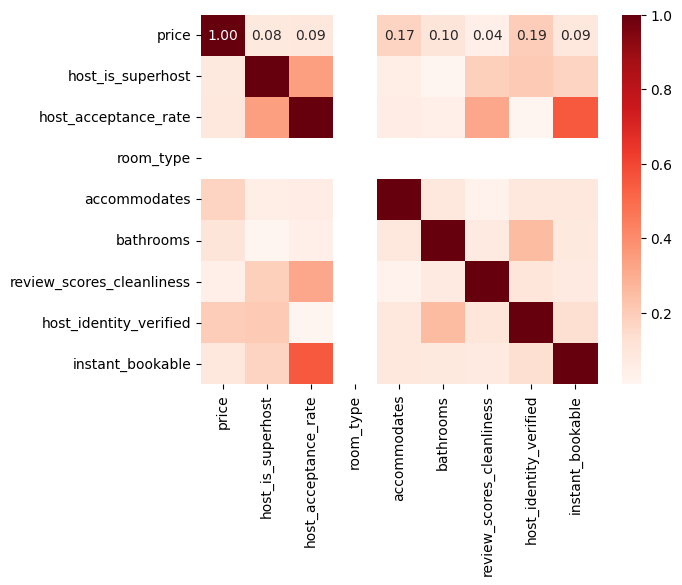

In [43]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap = 'Reds', annot=True, fmt=".2f")

Price Vs Host is Superhost

In [44]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_is_superhost"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_is_superhost',y='price',color='blue',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='red',data=df)

<Axes: xlabel='host_is_superhost', ylabel='price'>

In [47]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_is_superhost']]
Var_Dep = df['price']

In [48]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [49]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [50]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([74.00701135]),
 'rank_': 1,
 'singular_': array([7.47030697]),
 'intercept_': 227.63477969434274}

In [51]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.006385447251648357

In [52]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_is_superhost']])
y_predic

array([375.6488024 , 375.6488024 , 301.64179104, 375.6488024 ,
       301.64179104, 375.6488024 , 375.6488024 , 375.6488024 ,
       375.6488024 , 375.6488024 , 375.6488024 , 375.6488024 ,
       375.6488024 , 375.6488024 , 375.6488024 , 375.6488024 ,
       375.6488024 , 375.6488024 , 375.6488024 , 375.6488024 ,
       375.6488024 , 375.6488024 , 375.6488024 , 375.6488024 ,
       375.6488024 , 375.6488024 , 375.6488024 , 375.6488024 ,
       375.6488024 , 375.6488024 , 375.6488024 , 375.6488024 ,
       375.6488024 , 375.6488024 , 375.6488024 , 375.6488024 ,
       375.6488024 , 375.6488024 , 375.6488024 , 375.6488024 ,
       375.6488024 , 375.6488024 , 375.6488024 , 375.6488024 ,
       375.6488024 , 375.6488024 , 375.6488024 , 375.6488024 ,
       375.6488024 , 375.6488024 , 375.6488024 , 375.6488024 ,
       375.6488024 , 375.6488024 , 375.6488024 , 301.64179104,
       375.6488024 , 375.6488024 , 375.6488024 , 375.6488024 ,
       375.6488024 , 375.6488024 , 375.6488024 , 375.64

In [53]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones', y_predic)
df

Predicciones   price  host_is_superhost  host_acceptance_rate  room_type  \
0      375.648802     0.0                  2                  0.00          3   
1      375.648802   640.0                  2                  0.00          3   
2      301.641791   290.0                  1                  0.85          3   
3      375.648802   932.7                  2                  0.31          3   
4      301.641791   550.0                  1                  0.94          3   
..            ...     ...                ...                   ...        ...   
396    375.648802  1200.0                  2                  1.00          3   
397    375.648802    70.0                  2                  1.00          3   
398    375.648802    70.0                  2                  1.00          3   
399    375.648802  1058.0                  2                  0.00          3   
400    375.648802    50.0                  2                  1.00          3   

     accommodates  bathrooms  review_scores_cleanliness  \
0            2.00       1.00                       4.76   
1            1.00       1.50                       4.76   
2            2.94       1.32                       4.86   
3            2.94       1.32                       4.76   
4            2.94       3.00                       4.93   
..            ...        ...                        ...   
396          6.00       1.00                       4.76   
397          2.00       1.00                       4.76   
398          2.00       1.00                       4.76   
399          2.94       2.50                       5.00   
400          1.00       1.00                       4.76   

     host_identity_verified  instant_bookable  
0                         2                 2  
1                         1                 1  
2                         1                 2  
3                         1                 2  
4                         1                 1  
..                      ...               ...  
396                       1                 2  
397                       1                 1  
398                       1                 1  
399                       1                 2  
400                       1                 1  

[401 rows x 10 columns]

<Axes: xlabel='host_is_superhost', ylabel='price'>

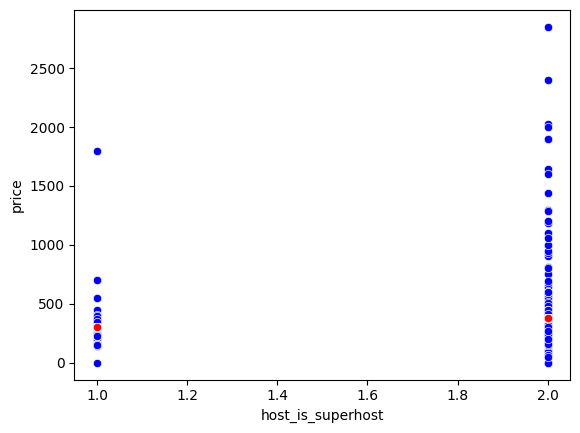

In [54]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='host_is_superhost',y='price',color='blue',data = df)
sns.scatterplot(x='host_is_superhost',y='Predicciones',color='red',data = df)

In [55]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.006385447251648357

In [56]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.0799089935592256

Accomodates Vs Bathrooms

<Axes: xlabel='bathrooms', ylabel='price'>

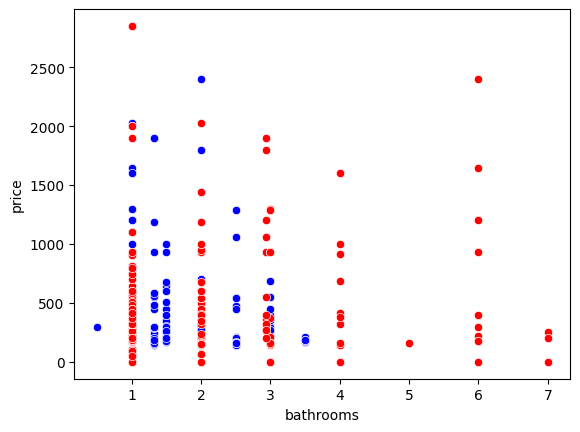

In [57]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "bathrooms"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='bathrooms',y='price',color='blue',data=df)
sns.scatterplot(x='accommodates',y='price',color='red',data=df)

In [58]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['bathrooms']]
Var_Dep = df['price']

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [60]:
type(model)

sklearn.linear_model._base.LinearRegression

In [61]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [62]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-49.16374858]),
 'rank_': 1,
 'singular_': array([14.5128368]),
 'intercept_': 439.5596871437528}

In [63]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.010635631786818922

In [64]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['bathrooms']])
y_predic

array([390.39593856, 365.81406427, 374.66353901, 374.66353901,
       292.06844139, 390.39593856, 374.66353901, 390.39593856,
       390.39593856, 390.39593856, 390.39593856, 390.39593856,
       390.39593856, 390.39593856, 390.39593856, 390.39593856,
       390.39593856, 390.39593856, 390.39593856, 390.39593856,
       390.39593856, 390.39593856, 390.39593856, 365.81406427,
       390.39593856, 390.39593856, 390.39593856, 390.39593856,
       390.39593856, 365.81406427, 365.81406427, 390.39593856,
       365.81406427, 365.81406427, 390.39593856, 390.39593856,
       365.81406427, 365.81406427, 365.81406427, 365.81406427,
       390.39593856, 365.81406427, 390.39593856, 365.81406427,
       390.39593856, 390.39593856, 390.39593856, 390.39593856,
       390.39593856, 390.39593856, 390.39593856, 390.39593856,
       390.39593856, 390.39593856, 390.39593856, 341.23218997,
       390.39593856, 390.39593856, 390.39593856, 390.39593856,
       390.39593856, 390.39593856, 390.39593856, 374.66

In [65]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones2', y_predic)
df

Predicciones2  Predicciones   price  host_is_superhost  \
0       390.395939    375.648802     0.0                  2   
1       365.814064    375.648802   640.0                  2   
2       374.663539    301.641791   290.0                  1   
3       374.663539    375.648802   932.7                  2   
4       292.068441    301.641791   550.0                  1   
..             ...           ...     ...                ...   
396     390.395939    375.648802  1200.0                  2   
397     390.395939    375.648802    70.0                  2   
398     390.395939    375.648802    70.0                  2   
399     316.650316    375.648802  1058.0                  2   
400     390.395939    375.648802    50.0                  2   

     host_acceptance_rate  room_type  accommodates  bathrooms  \
0                    0.00          3          2.00       1.00   
1                    0.00          3          1.00       1.50   
2                    0.85          3          2.94       1.32   
3                    0.31          3          2.94       1.32   
4                    0.94          3          2.94       3.00   
..                    ...        ...           ...        ...   
396                  1.00          3          6.00       1.00   
397                  1.00          3          2.00       1.00   
398                  1.00          3          2.00       1.00   
399                  0.00          3          2.94       2.50   
400                  1.00          3          1.00       1.00   

     review_scores_cleanliness  host_identity_verified  instant_bookable  
0                         4.76                       2                 2  
1                         4.76                       1                 1  
2                         4.86                       1                 2  
3                         4.76                       1                 2  
4                         4.93                       1                 1  
..                         ...                     ...               ...  
396                       4.76                       1                 2  
397                       4.76                       1                 1  
398                       4.76                       1                 1  
399                       5.00                       1                 2  
400                       4.76                       1                 1  

[401 rows x 11 columns]

<Axes: xlabel='bathrooms', ylabel='price'>

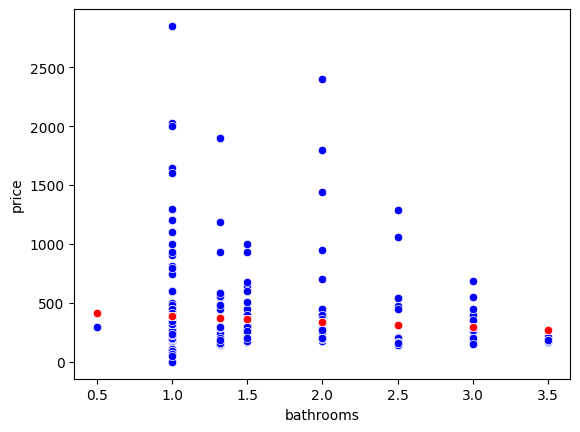

In [66]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='bathrooms',y='price',color='blue',data = df)
sns.scatterplot(x='bathrooms',y='Predicciones2',color='red',data = df)

In [67]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.010635631786818922

In [68]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.103129199486949

Review_scores_cleanliness vs price

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

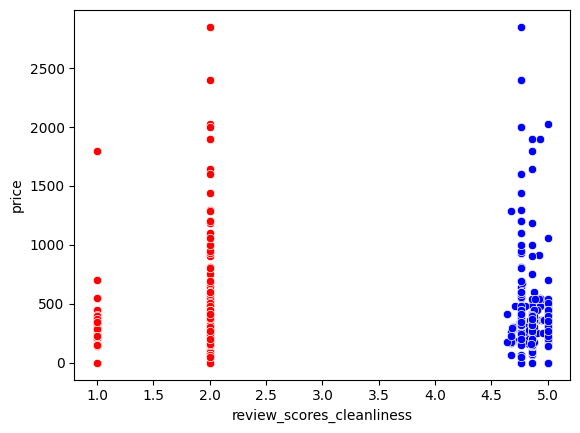

In [69]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='review_scores_cleanliness',y='price',color='blue',data=df)
sns.scatterplot(x='host_is_superhost',y='price',color='red',data=df)

In [70]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['review_scores_cleanliness']]
Var_Dep = df['price']

In [71]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [72]:
type(model)

sklearn.linear_model._base.LinearRegression

In [73]:

# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [74]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-153.50173088]),
 'rank_': 1,
 'singular_': array([1.92267685]),
 'intercept_': 1106.679791465189}

In [75]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.0018197337176418804

In [76]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['review_scores_cleanliness']])
y_predic

array([376.0115525 , 376.0115525 , 360.66137941, 376.0115525 ,
       349.91625825, 376.0115525 , 360.66137941, 376.0115525 ,
       376.0115525 , 360.66137941, 351.45127556, 376.0115525 ,
       369.87148326, 360.66137941, 376.0115525 , 376.0115525 ,
       339.17113709, 376.0115525 , 339.17113709, 376.0115525 ,
       357.59134479, 376.0115525 , 357.59134479, 376.0115525 ,
       376.0115525 , 376.0115525 , 376.0115525 , 394.4317602 ,
       376.0115525 , 360.66137941, 360.66137941, 360.66137941,
       360.66137941, 360.66137941, 360.66137941, 339.17113709,
       360.66137941, 366.80144865, 374.47653519, 360.66137941,
       389.82670828, 386.75667366, 365.26643134, 360.66137941,
       376.0115525 , 360.66137941, 376.0115525 , 376.0115525 ,
       376.0115525 , 376.0115525 , 360.66137941, 360.66137941,
       360.66137941, 389.82670828, 376.0115525 , 360.66137941,
       376.0115525 , 360.66137941, 360.66137941, 360.66137941,
       360.66137941, 376.0115525 , 376.0115525 , 349.91

In [77]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones3', y_predic)
df

Predicciones3  Predicciones2  Predicciones   price  host_is_superhost  \
0       376.011552     390.395939    375.648802     0.0                  2   
1       376.011552     365.814064    375.648802   640.0                  2   
2       360.661379     374.663539    301.641791   290.0                  1   
3       376.011552     374.663539    375.648802   932.7                  2   
4       349.916258     292.068441    301.641791   550.0                  1   
..             ...            ...           ...     ...                ...   
396     376.011552     390.395939    375.648802  1200.0                  2   
397     376.011552     390.395939    375.648802    70.0                  2   
398     376.011552     390.395939    375.648802    70.0                  2   
399     339.171137     316.650316    375.648802  1058.0                  2   
400     376.011552     390.395939    375.648802    50.0                  2   

     host_acceptance_rate  room_type  accommodates  bathrooms  \
0                    0.00          3          2.00       1.00   
1                    0.00          3          1.00       1.50   
2                    0.85          3          2.94       1.32   
3                    0.31          3          2.94       1.32   
4                    0.94          3          2.94       3.00   
..                    ...        ...           ...        ...   
396                  1.00          3          6.00       1.00   
397                  1.00          3          2.00       1.00   
398                  1.00          3          2.00       1.00   
399                  0.00          3          2.94       2.50   
400                  1.00          3          1.00       1.00   

     review_scores_cleanliness  host_identity_verified  instant_bookable  
0                         4.76                       2                 2  
1                         4.76                       1                 1  
2                         4.86                       1                 2  
3                         4.76                       1                 2  
4                         4.93                       1                 1  
..                         ...                     ...               ...  
396                       4.76                       1                 2  
397                       4.76                       1                 1  
398                       4.76                       1                 1  
399                       5.00                       1                 2  
400                       4.76                       1                 1  

[401 rows x 12 columns]

In [78]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_cleanliness',y='price',color='blue',data = df)
sns.scatterplot(x='review_scores_cleanliness',y='Predicciones3',color='red',data = df)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

In [79]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.0018197337176418804

In [80]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.04265833702386768

preice vs host identity verified

<Axes: xlabel='host_identity_verified', ylabel='price'>

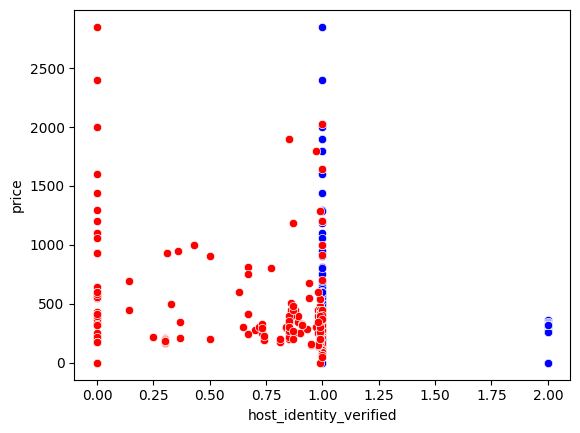

In [81]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_identity_verified',y='price',color='blue',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='red',data=df)

In [82]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_identity_verified']]
Var_Dep = df['price']

In [83]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [84]:
type(model)

sklearn.linear_model._base.LinearRegression

In [85]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [86]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-175.61731541]),
 'rank_': 1,
 'singular_': array([7.64388172]),
 'intercept_': 569.9951941954761}

In [87]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.037647078197115325

In [88]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_identity_verified']])
y_predic

array([218.76056338, 394.37787879, 394.37787879, 394.37787879,
       394.37787879, 394.37787879, 394.37787879, 394.37787879,
       394.37787879, 394.37787879, 394.37787879, 218.76056338,
       394.37787879, 394.37787879, 218.76056338, 218.76056338,
       394.37787879, 218.76056338, 218.76056338, 218.76056338,
       394.37787879, 218.76056338, 394.37787879, 394.37787879,
       218.76056338, 394.37787879, 218.76056338, 394.37787879,
       394.37787879, 394.37787879, 394.37787879, 394.37787879,
       394.37787879, 394.37787879, 394.37787879, 394.37787879,
       394.37787879, 394.37787879, 394.37787879, 394.37787879,
       394.37787879, 394.37787879, 394.37787879, 394.37787879,
       218.76056338, 218.76056338, 218.76056338, 218.76056338,
       218.76056338, 394.37787879, 394.37787879, 394.37787879,
       394.37787879, 394.37787879, 394.37787879, 394.37787879,
       218.76056338, 394.37787879, 394.37787879, 394.37787879,
       394.37787879, 394.37787879, 218.76056338, 394.37

In [89]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones4', y_predic)
df

Predicciones4  Predicciones3  Predicciones2  Predicciones   price  \
0       218.760563     376.011552     390.395939    375.648802     0.0   
1       394.377879     376.011552     365.814064    375.648802   640.0   
2       394.377879     360.661379     374.663539    301.641791   290.0   
3       394.377879     376.011552     374.663539    375.648802   932.7   
4       394.377879     349.916258     292.068441    301.641791   550.0   
..             ...            ...            ...           ...     ...   
396     394.377879     376.011552     390.395939    375.648802  1200.0   
397     394.377879     376.011552     390.395939    375.648802    70.0   
398     394.377879     376.011552     390.395939    375.648802    70.0   
399     394.377879     339.171137     316.650316    375.648802  1058.0   
400     394.377879     376.011552     390.395939    375.648802    50.0   

     host_is_superhost  host_acceptance_rate  room_type  accommodates  \
0                    2                  0.00          3          2.00   
1                    2                  0.00          3          1.00   
2                    1                  0.85          3          2.94   
3                    2                  0.31          3          2.94   
4                    1                  0.94          3          2.94   
..                 ...                   ...        ...           ...   
396                  2                  1.00          3          6.00   
397                  2                  1.00          3          2.00   
398                  2                  1.00          3          2.00   
399                  2                  0.00          3          2.94   
400                  2                  1.00          3          1.00   

     bathrooms  review_scores_cleanliness  host_identity_verified  \
0         1.00                       4.76                       2   
1         1.50                       4.76                       1   
2         1.32                       4.86                       1   
3         1.32                       4.76                       1   
4         3.00                       4.93                       1   
..         ...                        ...                     ...   
396       1.00                       4.76                       1   
397       1.00                       4.76                       1   
398       1.00                       4.76                       1   
399       2.50                       5.00                       1   
400       1.00                       4.76                       1   

     instant_bookable  
0                   2  
1                   1  
2                   2  
3                   2  
4                   1  
..                ...  
396                 2  
397                 1  
398                 1  
399                 2  
400                 1  

[401 rows x 13 columns]

<Axes: xlabel='host_identity_verified', ylabel='price'>

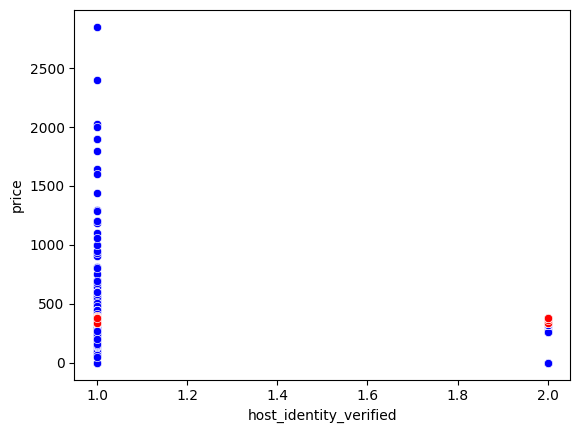

In [90]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='host_identity_verified',y='price',color='blue',data = df)
sns.scatterplot(x='host_identity_verified',y='Predicciones3',color='red',data = df)

In [91]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.037647078197115325

In [92]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.19402854995364813

price vs instant bookable

In [93]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "instant_bookable"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='instant_bookable',y='price',color='blue',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='red',data=df)

<Axes: xlabel='instant_bookable', ylabel='price'>

In [94]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['instant_bookable']]
Var_Dep = df['price']

In [95]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [96]:
type(model)

sklearn.linear_model._base.LinearRegression

In [97]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [98]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-63.91892898]),
 'rank_': 1,
 'singular_': array([9.98977033]),
 'intercept_': 457.0100504772853}

In [99]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.008518020445996699

In [100]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['instant_bookable']])
y_predic

array([329.17219251, 393.0911215 , 329.17219251, 329.17219251,
       393.0911215 , 329.17219251, 329.17219251, 329.17219251,
       329.17219251, 393.0911215 , 393.0911215 , 329.17219251,
       329.17219251, 329.17219251, 329.17219251, 329.17219251,
       329.17219251, 329.17219251, 329.17219251, 329.17219251,
       329.17219251, 329.17219251, 329.17219251, 329.17219251,
       329.17219251, 329.17219251, 329.17219251, 329.17219251,
       329.17219251, 393.0911215 , 393.0911215 , 393.0911215 ,
       393.0911215 , 393.0911215 , 393.0911215 , 329.17219251,
       393.0911215 , 393.0911215 , 393.0911215 , 393.0911215 ,
       393.0911215 , 393.0911215 , 393.0911215 , 393.0911215 ,
       329.17219251, 329.17219251, 329.17219251, 329.17219251,
       329.17219251, 329.17219251, 393.0911215 , 393.0911215 ,
       329.17219251, 393.0911215 , 329.17219251, 393.0911215 ,
       329.17219251, 393.0911215 , 393.0911215 , 393.0911215 ,
       393.0911215 , 329.17219251, 329.17219251, 393.09

In [101]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones5', y_predic)
df

Predicciones5  Predicciones4  Predicciones3  Predicciones2  Predicciones  \
0       329.172193     218.760563     376.011552     390.395939    375.648802   
1       393.091121     394.377879     376.011552     365.814064    375.648802   
2       329.172193     394.377879     360.661379     374.663539    301.641791   
3       329.172193     394.377879     376.011552     374.663539    375.648802   
4       393.091121     394.377879     349.916258     292.068441    301.641791   
..             ...            ...            ...            ...           ...   
396     329.172193     394.377879     376.011552     390.395939    375.648802   
397     393.091121     394.377879     376.011552     390.395939    375.648802   
398     393.091121     394.377879     376.011552     390.395939    375.648802   
399     329.172193     394.377879     339.171137     316.650316    375.648802   
400     393.091121     394.377879     376.011552     390.395939    375.648802   

      price  host_is_superhost  host_acceptance_rate  room_type  accommodates  \
0       0.0                  2                  0.00          3          2.00   
1     640.0                  2                  0.00          3          1.00   
2     290.0                  1                  0.85          3          2.94   
3     932.7                  2                  0.31          3          2.94   
4     550.0                  1                  0.94          3          2.94   
..      ...                ...                   ...        ...           ...   
396  1200.0                  2                  1.00          3          6.00   
397    70.0                  2                  1.00          3          2.00   
398    70.0                  2                  1.00          3          2.00   
399  1058.0                  2                  0.00          3          2.94   
400    50.0                  2                  1.00          3          1.00   

     bathrooms  review_scores_cleanliness  host_identity_verified  \
0         1.00                       4.76                       2   
1         1.50                       4.76                       1   
2         1.32                       4.86                       1   
3         1.32                       4.76                       1   
4         3.00                       4.93                       1   
..         ...                        ...                     ...   
396       1.00                       4.76                       1   
397       1.00                       4.76                       1   
398       1.00                       4.76                       1   
399       2.50                       5.00                       1   
400       1.00                       4.76                       1   

     instant_bookable  
0                   2  
1                   1  
2                   2  
3                   2  
4                   1  
..                ...  
396                 2  
397                 1  
398                 1  
399                 2  
400                 1  

[401 rows x 14 columns]

In [102]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='instant_bookable',y='price',color='blue',data = df)
sns.scatterplot(x='instant_bookable',y='Predicciones5',color='red',data = df)

<Axes: xlabel='instant_bookable', ylabel='price'>

In [103]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.008518020445996699

In [104]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.09229312241980277